# 🧠 1. Business Understanding

*   Tujuan: Membuat model prediksi risiko stroke berdasarkan data pasien
*   Dataset: https://www.kaggle.com/competitions/playground-series-s3e2stroke-prediction (dari GitHub)



In [82]:
import pandas as pd
import numpy as np

In [83]:
# Load data

train_df = pd.read_csv("https://raw.githubusercontent.com/ginamalia/stroke-prediction/refs/heads/main/data/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/ginamalia/stroke-prediction/refs/heads/main/data/test.csv")
sub_df = pd.read_csv("https://raw.githubusercontent.com/ginamalia/stroke-prediction/refs/heads/main/data/sample_submission.csv")

# 📊 2. Data Understanding

## Exploratory Data Analysis

In [84]:
# Struktur data

train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [85]:
# Data unik kolom target

train_df['stroke'].unique()

array([0, 1])

In [86]:
# Info data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [87]:
# Statistik deskriptif variabel numerik

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [88]:
# Data unik

train_df.nunique()

,0
id,15304
gender,3
age,106
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3740
bmi,407


In [89]:
# Data duplicate

train_df.duplicated().sum()

np.int64(0)

In [90]:
# Data umur (age)

sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [91]:
# Data jenis kelamin (gender)

train_df['gender'].value_counts()

,count
gender,
Female,9446
Male,5857
Other,1


In [92]:
# Visualisasi data dan analisis korelasi

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [93]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [94]:
# Filter data untuk stroke & non stroke

no_stroke_data = train_df[train_df['stroke'] == 0 ]
stroke_data = train_df[train_df['stroke'] == 1 ]

## Univariate Analysis

In [95]:
# Analisis proporsi stroke

stroke_count = train_df['stroke'].value_counts()

In [96]:
stroke_count

,count
stroke,
0,14672
1,632


In [97]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['Tidak', 'Ya'],
    title = 'Proporsi Kasus Stroke',
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Status Stroke', title_x=0.3, title_y = 0.95)
fig.show()

## Bivariate Analysis

In [98]:
def custom_historgram(columns:str, titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['Non-Stroke', 'Stroke'])
    histogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1])
    fig.update_yaxes(title_text = 'Count')
    return fig

In [99]:
# Distribusi rata-rata level glukosa (avg_glucose_level) berdasarkan keberadaan stroke

fig = custom_historgram('avg_glucose_level', ['Rata-Rata Level Glukosa Berdasarkan Keberadaan Stroke', 'Rata-Rata Level Glukosa'])
fig.show()

In [100]:
# Distribusi umur (age) berdasarkan keberadaan stroke

fig = custom_historgram('age', ['Distribusi Umur Berdasarkan Keberadaan Stroke', 'Umur'])
fig.show()

In [101]:
## Rata-rata BMI pada Data Stroke dan Tidak Stroke

bmi_means = pd.DataFrame({
    'Kelompok': ['Stroke', 'Non-Stroke'],
    'Rata-rata BMI': [
        stroke_data['bmi'].mean(),
        no_stroke_data['bmi'].mean()
    ]
})

bmi_means

,Kelompok,Rata-rata BMI
0,Stroke,30.230696
1,Non-Stroke,28.021489


In [102]:
# Distribusi BMI berdasarkan keberadaan stroke

fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color,
                   title='BMI & Status Stroke',
               labels={'stroke': 'Status Stroke', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show()

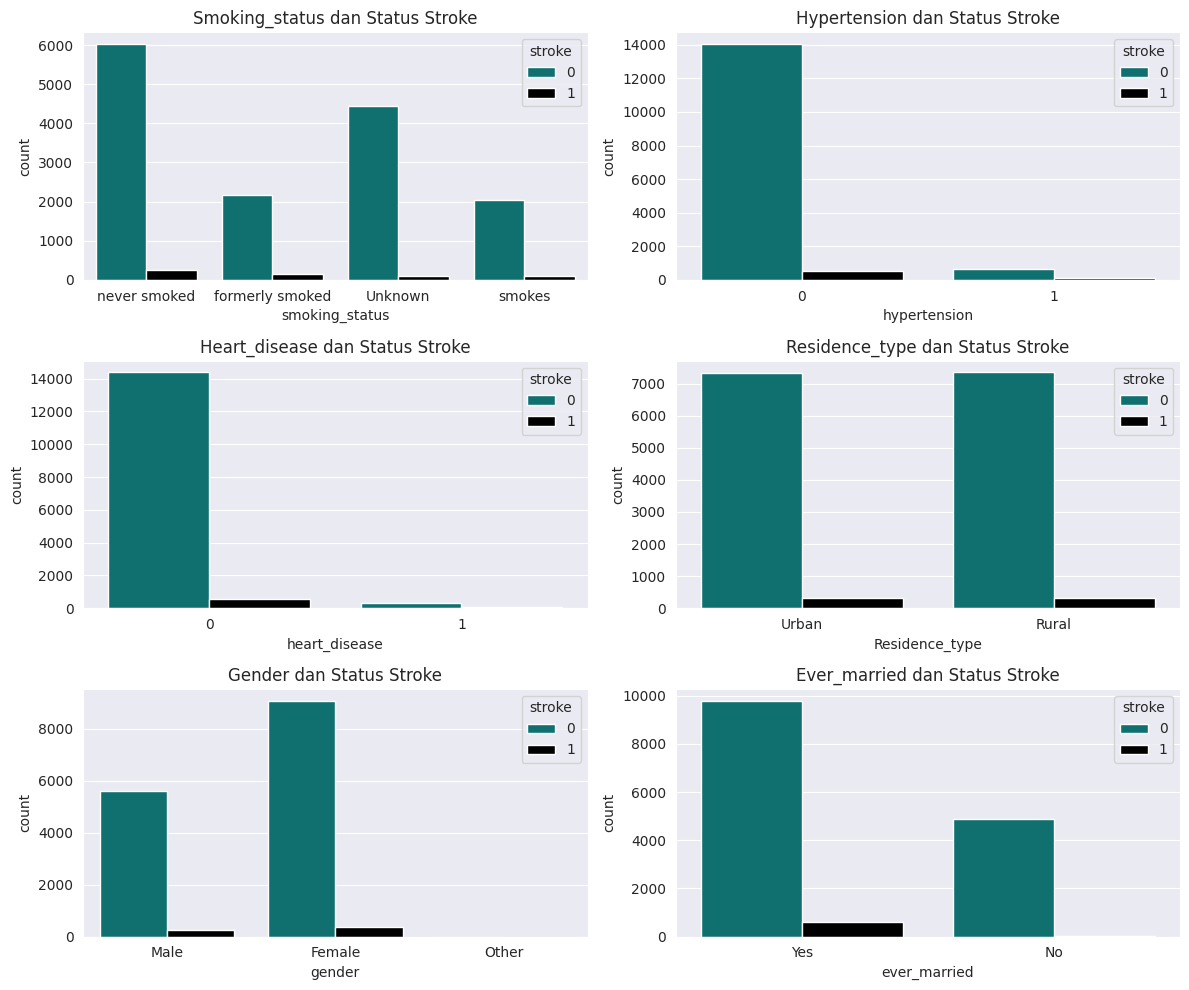

In [103]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} dan Status Stroke')

plt.tight_layout()
plt.show()

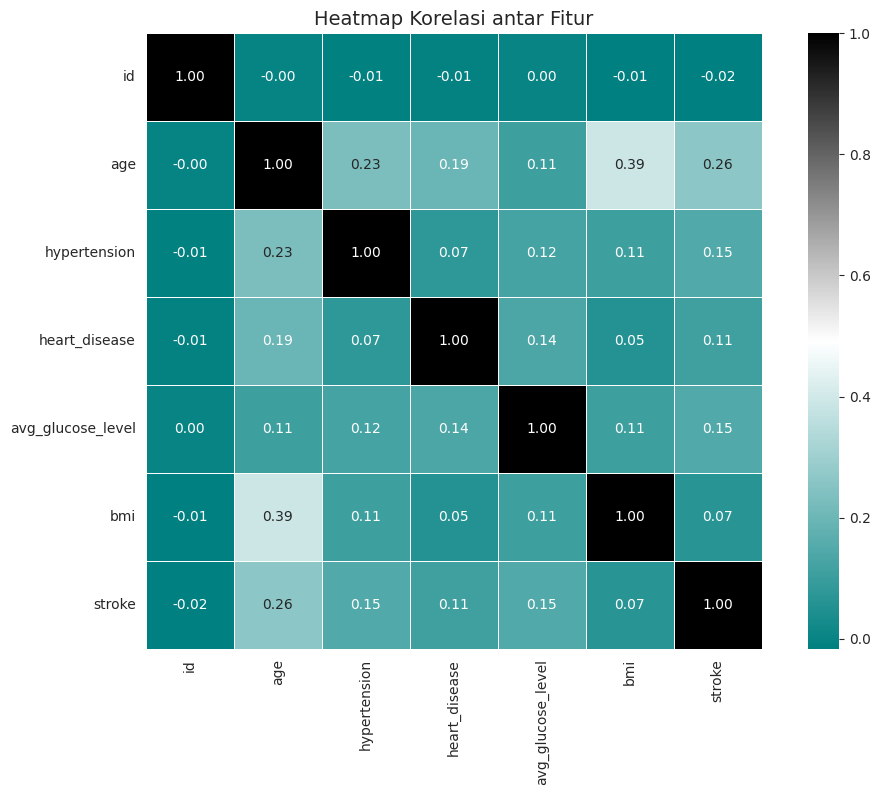

In [104]:
from matplotlib.colors import LinearSegmentedColormap

# Hitung korelasi numerik
correlation_matrix = train_df.corr(numeric_only=True)

# Buat colormap dari teal → putih → hitam
colors = ['#008080', '#FFFFFF', 'black']  # teal ke putih ke hitam
custom_cmap = LinearSegmentedColormap.from_list("teal_white_black", colors, N=256)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur', fontsize=14)
plt.show()

# 🧹 3. Data Preparation

## Data Cleaning

In [105]:
# Pembulatan usia ke atas (ceiling)

train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [106]:
# Menghapus data dengan gender 'other'

train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

## Feature Engineering dan Selection

In [107]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [108]:
# Penentuan fitur masukan

input_cols = list(train_df.columns)[1:-1]
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [109]:
# Penentuan kolom target

target_col = 'stroke'

In [110]:
# Pemisahan input dan target pada data latih

train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

# Penyiapan input dari data uji

test_inputs = test_df[input_cols].copy()

In [111]:
# Pemisahan kolom numerik

numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [112]:
# Pemisahan kolom kategorikal

categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [113]:
# Penghapusan 'smoking_status' dari kategori

categorical_cols.remove('smoking_status')

## Encoding Data Kategorikal

In [114]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [115]:
# Ordinal encoding untuk kolom smoking_status

ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [116]:
# OneHot Encoding untuk kolom kategorikal lain

onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [117]:
# Penggabungan dua jenis encoding dengan ColumnTransformer

preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']),
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [118]:
# Fitting

preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [119]:
encoded_cols = list(preprocessor.get_feature_names_out())
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

## Persiapan Data Final

In [120]:
# Transformasi fitur dengan preprocessor

train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [121]:
# Penggabungan fitur numerik dengan hasil encoding

X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [122]:
# Pengecekan konsistensi jumlah fitur

X_train.shape[1] == X_test.shape[1]

True

## Data Splitting

In [123]:
# Split dataset menjadi training and validation set

from sklearn.model_selection import train_test_split

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [125]:
X_train.shape

(12242, 17)

# 🤖 4. Modeling

## Baseline Model

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [127]:
models = [
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose = 1), 'LightGBM')
]

In [128]:
# Fungsi evaluasi

def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [129]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)

    return model_metrics

In [130]:
# Fit dan evaluasi

predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)
    final_results = pd.concat(predictions, ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [131]:
final_results

,Model,Accuarcy,Precision,Recall,F1
0,LogisticRegression,0.955243,0.333333,0.022388,0.041958
1,RandomForestClassifier,0.954590,0.368421,0.052239,0.091503
2,XGBClassifier,0.953610,0.388889,0.104478,0.164706
3,LightGBM,0.954590,0.380952,0.059701,0.103226


## Penanganan Imbalanced Dataset (SMOTE)

In [132]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [133]:
X_train_ns.shape

(23488, 17)

In [134]:
# Contoh model setelah SMOTE

lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [135]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix untuk {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix untuk LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix untuk RandomForestClassifier
[[2915   12]
 [ 127    7]]

Confusion Matrix untuk XGBClassifier
[[2905   22]
 [ 120   14]]

Confusion Matrix untuk LightGBM
[[2914   13]
 [ 126    8]]

Confusion Matrix untuk Logistic With SMOTE
[[2308  619]
 [  31  103]]



## Ensemble Modeling (Voting Classifier)

In [136]:
from sklearn.ensemble import VotingClassifier

In [137]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())),
estimator.append(('RandomForestClassifier', RandomForestClassifier())),
estimator.append(('XGBClassifier', XGBClassifier())),
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [138]:
# Ensemble Modeling dengan Voting Classifier - Hard Voting

VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [139]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.955897,0.428571,0.022388,0.042553


In [140]:
# Ensemble Modeling dengan Voting Classifier - Soft Voting

VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [141]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.955243,0.4,0.044776,0.080537


# 📈 5. Evaluation

In [142]:
# Hasil Evaluasi Semua Model (Urut Berdasarkan Recall)

prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.787651,0.142659,0.768657,0.240654
XGBClassifier,0.953610,0.388889,0.104478,0.164706
LightGBM,0.954590,0.380952,0.059701,0.103226
RandomForestClassifier,0.954590,0.368421,0.052239,0.091503
VC_soft,0.955243,0.400000,0.044776,0.080537
LogisticRegression,0.955243,0.333333,0.022388,0.041958
VC_HARD,0.955897,0.428571,0.022388,0.042553


In [143]:
models_to_plot = [
    'Logistic With SMOTE',
    'XGBClassifier',
    'LightGBM',
    'RandomForestClassifier',
    'VC_soft',
    'LogisticRegression',
    'VC_HARD'
]

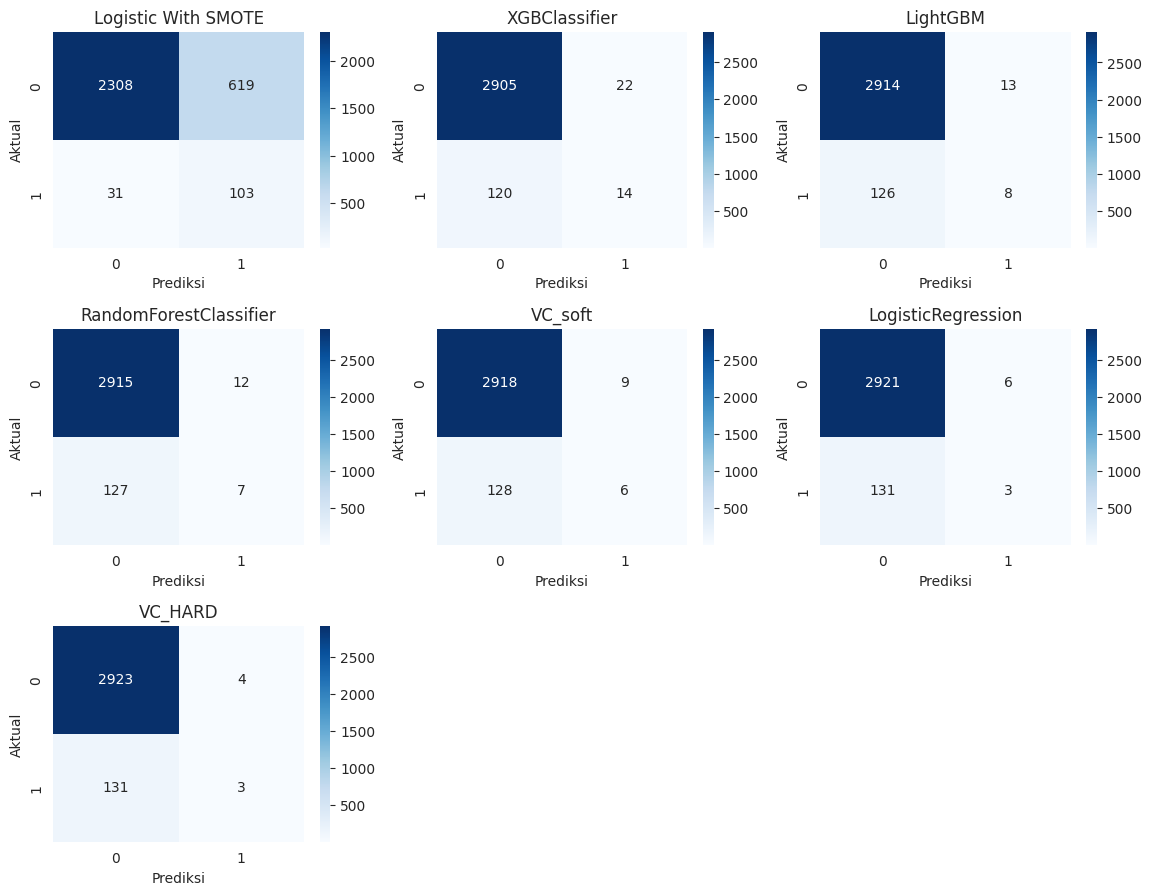

In [144]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # ubah ke array 1D untuk iterasi mudah

# Loop untuk plot model
for i, ax in enumerate(axes):
    if i < len(models_to_plot):
        model_name = models_to_plot[i]
        confusion_mat = confusion_mats[model_name]
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Prediksi')
        ax.set_ylabel('Aktual')
    else:
        # Kosongkan subplot yang tidak terpakai
        ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0)
plt.show()


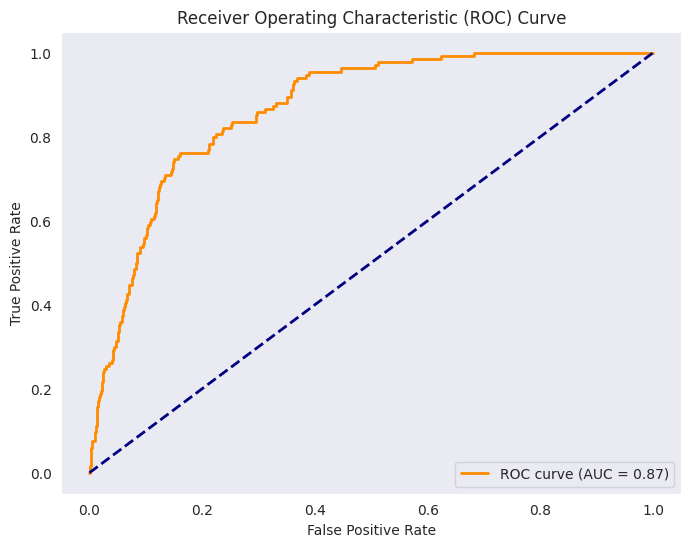

In [145]:
# AUC - ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Probabilitas prediksi untuk kelas positif
y_proba = lr_with_smote.predict_proba(X_val)[:, 1]

# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

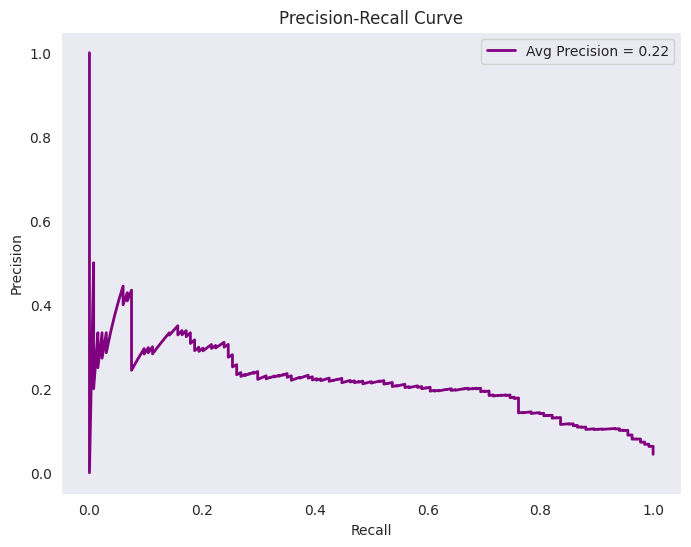

In [146]:
# Precision - recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Hitung Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
avg_precision = average_precision_score(y_val, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# 💾 6. Deployment (Preparation)

## Retrain Model

In [147]:
# Menyiapkan Data Latih untuk Model

X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [148]:
# Melakukan Prediksi pada Data Uji

preds = lr_with_smote.predict(X_test)
preds

array([0, 1, 0, ..., 0, 0, 0])

In [149]:
# Menyimpan Hasil Prediksi ke Variabel

sub_df = preds

In [150]:
# Menyimpan Hasil Prediksi ke File CSV

pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [151]:
# Membaca Kembali File Hasil Prediksi

sub_df = pd.read_csv("submission.csv")
sub_df.head()

,0
0,0
1,1
2,0
3,1
4,0


## Percobaan Prediksi Model untuk Input Tunggal

In [152]:
# Menambahkan Kolom Prediksi ke Data Submission

sub_df['stroke'] = preds
sub_df

,0,stroke
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [153]:
# Menampilkan Seluruh Kolom pada Dataset Pelatihan

train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [154]:
# Mendefinisikan Data Input Tunggal

single_input = {
    'gender': 'Male',
    'age': 33,
    'hypertension':0,
    'heart_disease': 0,
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [155]:
# Mengonversi Input Tunggal ke DataFrame

input_df = pd.DataFrame([single_input])

In [156]:
# Melakukan Transformasi Encoding pada Input Tunggal

input_df[encoded_cols] = preprocessor.transform(input_df)

In [157]:
# Menyiapkan Fitur Input untuk Prediksi

X = input_df[numerical_cols + encoded_cols]

In [158]:
# Melakukan Prediksi terhadap Input Tunggal

lr_with_smote.predict(X)

array([0])

## Menyimpan Model untuk Produksi

In [159]:
import joblib

In [160]:
model = {
    'encoded_cols': encoded_cols,
    'numeric_cols':numerical_cols,
    'preprocessor': preprocessor,
    'model': lr_with_smote
}

In [161]:
joblib.dump(model, 'model.joblib')

['model.joblib']